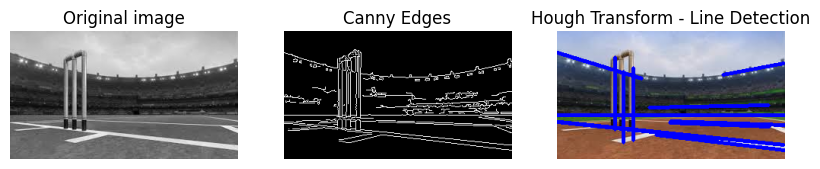

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Read image
img = cv2.imread(r'/content/download.jpeg', cv2.IMREAD_COLOR)
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the edges using Canny edge detection
edges = cv2.Canny(gray, 50, 200)
# Detect lines using Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=80, maxLineGap=10)
# Draw lines on the image (if lines are detected)
if lines is not None:
   for line in lines:
          x1, y1, x2, y2 = line[0]
          cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Convert images to RGB for Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Display images using Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img_rgb)
plt.title('Hough Transform - Line Detection')
plt.axis('off')
plt.show()

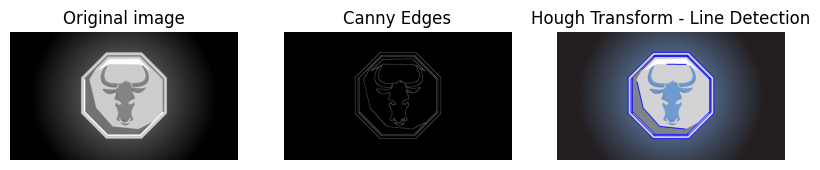

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Read image
img = cv2.imread(r'/content/stone.jpg', cv2.IMREAD_COLOR)
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the edges using Canny edge detection
edges = cv2.Canny(gray, 50, 200)
# Detect lines using Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=70, maxLineGap=10)
# Draw lines on the image (if lines are detected)
if lines is not None:
   for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Convert images to RGB for Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Display images using Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img_rgb)
plt.title('Hough Transform - Line Detection')
plt.axis('off')
plt.show()

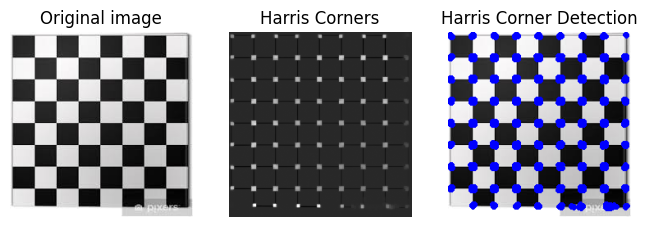

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
image = cv2.imread(r'/content/chess.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, blockSize=3, ksize=5, k=0.04)
dst = cv2.dilate(dst, None)
thresh = 0.02 * dst.max()
corner_image = np.copy(image_rgb)
for j in range(dst.shape[0]):
  for i in range(dst.shape[1]):
      if dst[j, i] > thresh:
        cv2.circle(corner_image, (i, j), 2, (0, 0, 255), 1)
# Display the result
plt.figure(figsize=(8, 6))
plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original image")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(dst, cmap='grey')
plt.title('Harris Corners')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(corner_image)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()
plt.savefig('harris.png')

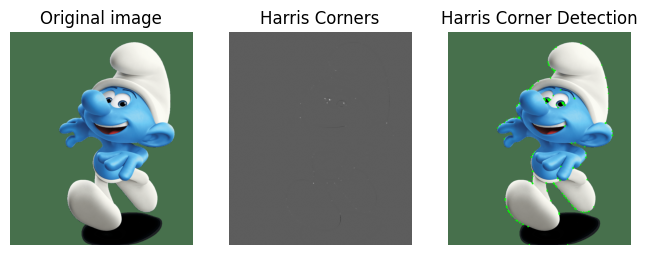

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
image = cv2.imread(r'/content/smurfs.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, blockSize=3, ksize=5, k=0.04)
dst = cv2.dilate(dst, None)
thresh = 0.02 * dst.max()
corner_image = np.copy(image_rgb)
for j in range(dst.shape[0]):
  for i in range(dst.shape[1]):
    if dst[j, i] > thresh:
      cv2.circle(corner_image, (i, j), 2, (0, 255, 0), 1)
# Display the result
plt.figure(figsize=(8, 6))
plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original image")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(dst, cmap='grey')
plt.title('Harris Corners')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(corner_image)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()
plt.savefig('harris.png')


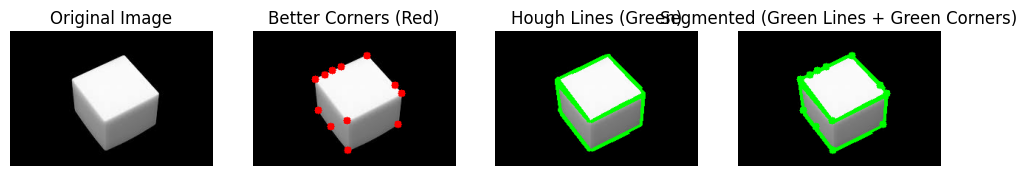

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread(r'/content/cube.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
# 🔹 Improved Corner Detection with goodFeaturesToTrack
corners = cv2.goodFeaturesToTrack(gray, maxCorners=50, qualityLevel=0.02, minDistance=10)
corners = np.int32(corners) # Convert to integer coordinates
# Copy image for corner visualization
corners_image = np.copy(image_rgb)
# Draw precise corners in **Red**
for i in corners:
  x, y = i.ravel()
  cv2.circle(corners_image, (x, y), 5, (255, 0, 0), -1) # Red dots
# 🔹 Canny Edge Detection & Hough Transform
edges = cv2.Canny(gray, 50, 150) # Adjusted thresholds
edges = cv2.dilate(edges, np.ones((3,3), np.uint8)) # Dilation for better line detection
# Improved Hough Line Detection
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=30, minLineLength=40, maxLineGap=10)
# Copy image for line visualization
lines_image = np.copy(image_rgb)
# Draw detected lines in **Green**
if lines is not None:
  for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(lines_image, (x1, y1), (x2, y2), (0, 255, 0), 2) # Green lines
# 🔹 Combine Corners & Lines (Final Segmentation)
segmented_image = np.copy(lines_image)
for i in corners:
  x, y = i.ravel()
  cv2.circle(segmented_image, (x, y), 5, (0, 255, 0), -1) # Green Corners
# 🔹 Display Results using Subplots
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(corners_image)
plt.title("Better Corners (Red)")
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(lines_image)
plt.title("Hough Lines (Green)")
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(segmented_image)
plt.title("Segmented (Green Lines + Green Corners)")
plt.axis('off')
plt.show()
